# <center><b> <em> Exploratory Data Analysis </em> </b></center>

### <font color="green"> | - Import des Biblio et Dataframe</font>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
# Définir une fonction de conversion pour la colonne datetime
def parse_datetime(date_string):
    return pd.to_datetime(date_string)

# Spécifier les types de données et les convertisseurs
dtype = {'invoice': str, 'object': int, 'stock_code': object, 'description': object, 'quantity': int, 'unit_price': float, 'customer_id': object, 'country': object}
converters = {'invoice_date': parse_datetime}

# Charger le fichier CSV en utilisant les types de données et les convertisseurs
data = pd.read_csv("../data/silver.csv", dtype=dtype, converters=converters)

invoice                 object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id             object
country                 object
dtype: object


In [23]:
data.shape

(1033036, 8)

In [35]:
df_churn_custmer = pd.read_csv("../data/df_churn_custmer.csv")

### <font color="green"> || - Numerical Variable Analysis : </font>

In [24]:
data.describe()

,quantity,unit_price
count,1.033036e+06,1.033036e+06
mean,1.007688e+01,4.613980e+00
std,1.751976e+02,1.223975e+02
min,-8.099500e+04,-5.359436e+04
25%,1.000000e+00,1.250000e+00
50%,3.000000e+00,2.100000e+00
75%,1.000000e+01,4.150000e+00
max,8.099500e+04,3.897000e+04


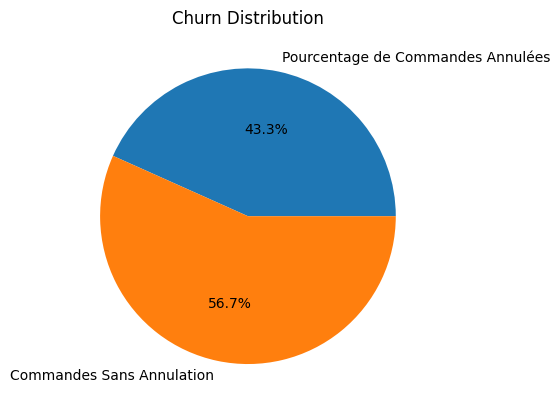

In [37]:
# Calculer le nombre de clients avec churn et sans churn
with_churn = len(df_churn_custmer[df_churn_custmer["pourcentage"] > 0])
without_churn = len(df_churn_custmer[df_churn_custmer["pourcentage"] == 0])

# Créer les données pour le graphique
churn_data = [with_churn, without_churn]
labels = ["Pourcentage de Commandes Annulées", "Commandes Sans Annulation"]

# Créer le graphique circulaire
plt.pie(churn_data, labels=labels, autopct='%1.1f%%')

# Définir le titre du graphique
plt.title("Churn Distribution")

# Afficher le graphique
plt.show()

### <font color="green"> ||| - Categorical Variable Analysis : </font>

In [28]:
descr_quant = data.groupby("description").agg({"quantity": "sum"}).sort_values("quantity", ascending=False)

In [29]:
descr_quant.head(15)

,quantity
description,
WORLD WAR 2 GLIDERS ASSTD DESIGNS,104546
WHITE HANGING HEART T-LIGHT HOLDER,91026
ASSORTED COLOUR BIRD ORNAMENT,79579
JUMBO BAG RED RETROSPOT,76514
BROCADE RING PURSE,69639
PACK OF 60 PINK PAISLEY CAKE CASES,55842
60 TEATIME FAIRY CAKE CASES,53678
SMALL POPCORN HOLDER,48234
PACK OF 72 RETROSPOT CAKE CASES,47695


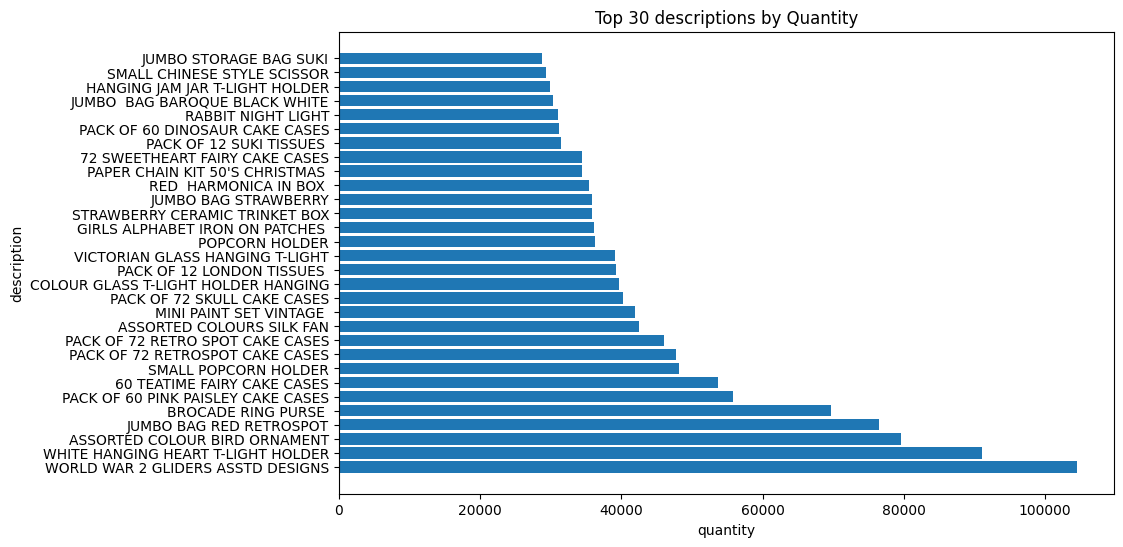

In [31]:
top_n = 30  # Adjust the number of bars to show

top_descriptions = descr_quant.head(top_n)
plt.figure(figsize=(10, 6))
plt.barh(top_descriptions.index, top_descriptions['quantity'])
plt.xlabel('quantity')
plt.ylabel('description')
plt.title('Top {} descriptions by Quantity'.format(top_n))
plt.show()

In [33]:
country_cust_data=data[['country','customer_id']].drop_duplicates()
country_cust_data.groupby(['country'])['customer_id'].aggregate('count').reset_index().sort_values('customer_id', ascending=False)

,country,customer_id
40,United Kingdom,5410
15,Germany,107
14,France,95
34,Spain,41
3,Belgium,29
30,Portugal,24
26,Netherlands,23
36,Switzerland,22
35,Sweden,19
20,Italy,17


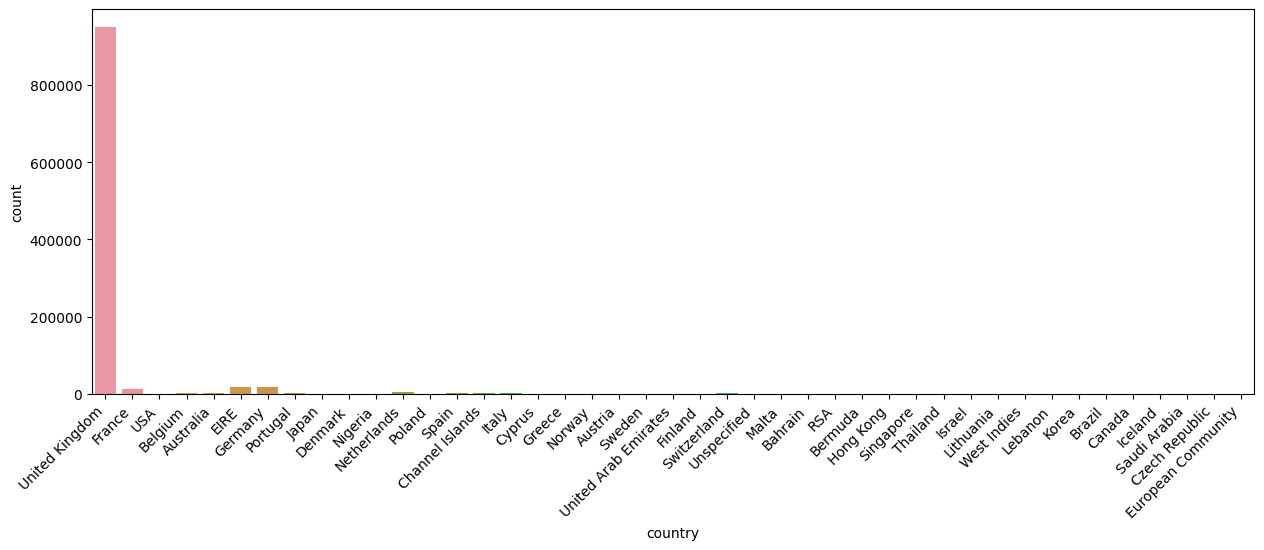

In [34]:
def cat_summary(dataframe, col_name, plot=False):
    if plot:
        fig_dims = (15, 5)
        fig, ax = plt.subplots(figsize=fig_dims)
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.xticks(rotation = 45, ha = 'right')
        plt.show()

cat_summary(data, "country", plot=True)

##### <font color="yellow">l’hypothèse nulle est : « les deux variables testées sont indépendantes » </font>